<a href="https://colab.research.google.com/github/8anisyamaura/Analisis_Ulasan_ChatGPT_App/blob/main/CPMK-2/Preprocessing_Review_aplikasi_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PREPROCESSING DATA

In [66]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
import re
import string
import nltk

In [67]:
data = pd.read_csv('hasil_scrap_ulasan_ChatGPT.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    2000 non-null   object
 1   Username     2000 non-null   object
 2   Rating       2000 non-null   int64 
 3   Review Text  2000 non-null   object
 4   Date         2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [68]:
data.head()

,Review ID,Username,Rating,Review Text,Date
0,d91c558a-c4b6-409c-be63-ee58f23233d3,Amanah Lawfirm,5,on banget,2025-10-18 07:12:44
1,f3c18b9e-6823-4e26-8b9b-66f0e91356f9,Abdul Azid,5,luar biasa,2025-10-18 07:11:35
2,32c7f57f-b71c-416a-b6fc-0884913cca8c,Safwan Hasbi,5,👍🏻,2025-10-18 07:09:36
3,e92797f2-38e3-49f0-b147-75f6fd017802,Aku Benar,4,aplikasi nya bagus bisa serba guna tapi buat u...,2025-10-18 07:07:46
4,65ae94de-59a3-4eb9-bdd6-0d3830d2e6b1,Anggerjiwa Pusaka,5,good,2025-10-18 07:05:36


**Hapus data duplikat**

In [69]:
df = pd.DataFrame(data[['Date','Username','Rating','Review Text']])
df.head()

,Date,Username,Rating,Review Text
0,2025-10-18 07:12:44,Amanah Lawfirm,5,on banget
1,2025-10-18 07:11:35,Abdul Azid,5,luar biasa
2,2025-10-18 07:09:36,Safwan Hasbi,5,👍🏻
3,2025-10-18 07:07:46,Aku Benar,4,aplikasi nya bagus bisa serba guna tapi buat u...
4,2025-10-18 07:05:36,Anggerjiwa Pusaka,5,good


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2000 non-null   object
 1   Username     2000 non-null   object
 2   Rating       2000 non-null   int64 
 3   Review Text  2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [71]:
df.drop_duplicates(subset ="Review Text", keep = 'first', inplace = True)

In [72]:
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 1420 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1420 non-null   object
 1   Username     1420 non-null   object
 2   Rating       1420 non-null   int64 
 3   Review Text  1420 non-null   object
dtypes: int64(1), object(3)
memory usage: 55.5+ KB


,Date,Username,Rating,Review Text
0,2025-10-18 07:12:44,Amanah Lawfirm,5,on banget
1,2025-10-18 07:11:35,Abdul Azid,5,luar biasa


**wordcloud sebelum preprocessing**

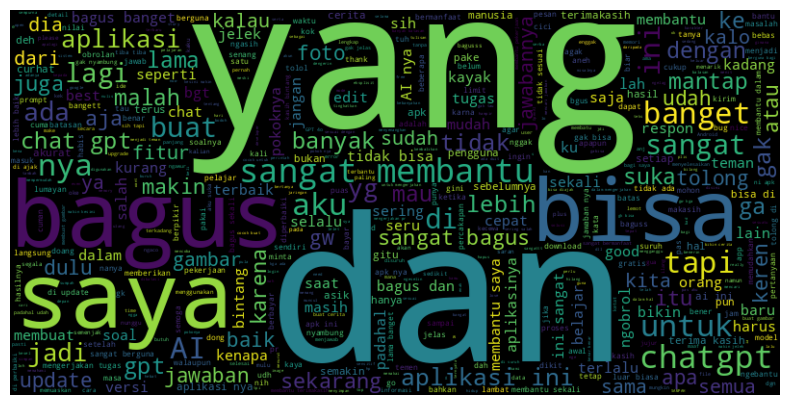

In [73]:
# Mengisi nilai NaN dengan string kosong ('')
df['Review Text'] = df['Review Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

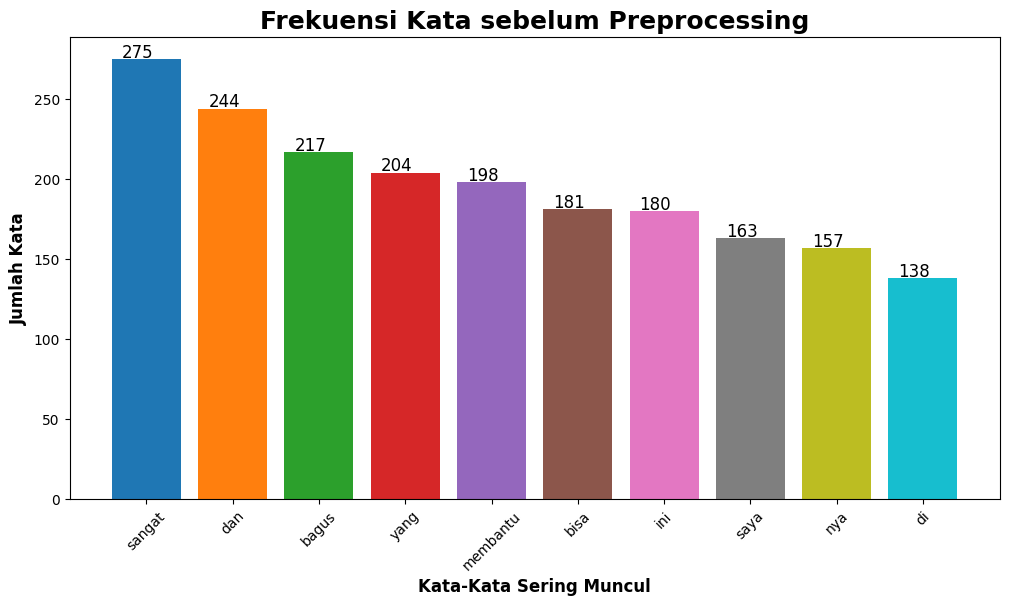

In [74]:
text = " ".join(df["Review Text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata sebelum Preprocessing", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

# **CLEANING DATA**

In [75]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning
0,2025-10-18 07:12:44,Amanah Lawfirm,5,on banget,on banget
1,2025-10-18 07:11:35,Abdul Azid,5,luar biasa,luar biasa
2,2025-10-18 07:09:36,Safwan Hasbi,5,👍🏻,
3,2025-10-18 07:07:46,Aku Benar,4,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...
4,2025-10-18 07:05:36,Anggerjiwa Pusaka,5,good,good


**Proses Case Folding**

In [76]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-10-18 07:12:44,Amanah Lawfirm,5,on banget,on banget,on banget
1,2025-10-18 07:11:35,Abdul Azid,5,luar biasa,luar biasa,luar biasa
2,2025-10-18 07:09:36,Safwan Hasbi,5,👍🏻,,
3,2025-10-18 07:07:46,Aku Benar,4,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...
4,2025-10-18 07:05:36,Anggerjiwa Pusaka,5,good,good,good


**Normalisasi Kata**

In [77]:
!pip install indo-normalizer

In [78]:
from indo_normalizer import Normalizer

normalizer = Normalizer()

def normalize_text(text):
    if isinstance(text, str):
        normalized_text, _ = normalizer.normalize_text(text)
        return normalized_text
    else:
        return text

df['normalisasi'] = df['case_folding'].apply(normalize_text)

Korpus '/usr/local/lib/python3.12/dist-packages/indo_normalizer/corpus/common_words.txt' berhasil dimuat. (18122 kata)
Korpus '/usr/local/lib/python3.12/dist-packages/indo_normalizer/corpus/slangs.csv' berhasil dimuat. (1284 pasangan)


In [79]:
df[['Review Text', 'case_folding', 'normalisasi']].head()

,Review Text,case_folding,normalisasi
0,on banget,on banget,dong banget
1,luar biasa,luar biasa,luar biasa
2,👍🏻,,
3,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...
4,good,good,good


**Menghapus kata yang kurang dari 3 huruf**

In [80]:
def remove_short_words(text, min_len=3):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if len(word) >= min_len]
        return " ".join(filtered_words)
    else:
        return text


In [81]:
df['normalisasi'] = df['normalisasi'].apply(remove_short_words)
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-10-18 07:12:44,Amanah Lawfirm,5,on banget,on banget,on banget,dong banget
1,2025-10-18 07:11:35,Abdul Azid,5,luar biasa,luar biasa,luar biasa,luar biasa
2,2025-10-18 07:09:36,Safwan Hasbi,5,👍🏻,,,
3,2025-10-18 07:07:46,Aku Benar,4,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...
4,2025-10-18 07:05:36,Anggerjiwa Pusaka,5,good,good,good,good


**Tokenisasi**

In [82]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2025-10-18 07:12:44,Amanah Lawfirm,5,on banget,on banget,on banget,dong banget,"[dong, banget]"
1,2025-10-18 07:11:35,Abdul Azid,5,luar biasa,luar biasa,luar biasa,luar biasa,"[luar, biasa]"
2,2025-10-18 07:09:36,Safwan Hasbi,5,👍🏻,,,,[]
3,2025-10-18 07:07:46,Aku Benar,4,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,"[aplikasi, nya, bagus, bisa, serba, guna, tapi..."
4,2025-10-18 07:05:36,Anggerjiwa Pusaka,5,good,good,good,good,[good]


**Stopword Removal**

In [83]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
stop_words = set(stopwords.words('indonesian'))
stop_words.update([
    'https', 'chatgpt', 'co', 'RT', '...', 'amp',
    'lu', 'deh', 'fyp', 'ya', 'nya', 'gue', 'sih',
    'chat', 'kalo', 'gambar', 'foto','golput','aplikasi','the','pakai','kayak', 'duit', 'kagak'
])

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-10-18 07:12:44,Amanah Lawfirm,5,on banget,on banget,on banget,dong banget,"[dong, banget]",[banget]
1,2025-10-18 07:11:35,Abdul Azid,5,luar biasa,luar biasa,luar biasa,luar biasa,"[luar, biasa]",[]
2,2025-10-18 07:09:36,Safwan Hasbi,5,👍🏻,,,,[],[]
3,2025-10-18 07:07:46,Aku Benar,4,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,"[aplikasi, nya, bagus, bisa, serba, guna, tapi...","[bagus, serba, upgrade, bayar, mahal]"
4,2025-10-18 07:05:36,Anggerjiwa Pusaka,5,good,good,good,good,[good],[good]


**Stemming Data**

In [85]:
# !pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [86]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-10-18 07:12:44,Amanah Lawfirm,5,on banget,on banget,on banget,dong banget,"[dong, banget]",[banget],banget
1,2025-10-18 07:11:35,Abdul Azid,5,luar biasa,luar biasa,luar biasa,luar biasa,"[luar, biasa]",[],
2,2025-10-18 07:09:36,Safwan Hasbi,5,👍🏻,,,,[],[],
3,2025-10-18 07:07:46,Aku Benar,4,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,"[aplikasi, nya, bagus, bisa, serba, guna, tapi...","[bagus, serba, upgrade, bayar, mahal]",bagus serba upgrade bayar mahal
4,2025-10-18 07:05:36,Anggerjiwa Pusaka,5,good,good,good,good,[good],[good],good


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1420 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1420 non-null   object
 1   Username          1420 non-null   object
 2   Rating            1420 non-null   int64 
 3   Review Text       1420 non-null   object
 4   cleaning          1420 non-null   object
 5   case_folding      1420 non-null   object
 6   normalisasi       1420 non-null   object
 7   tokenize          1420 non-null   object
 8   stopword removal  1420 non-null   object
 9   steming_data      1420 non-null   object
dtypes: int64(1), object(9)
memory usage: 154.3+ KB


**Wordcloud setelah preprocessing**


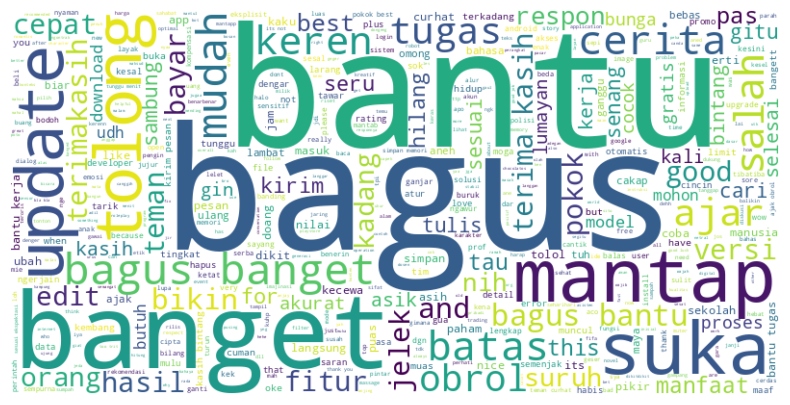

In [88]:
# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(df['steming_data'].astype(str).tolist())

wc = WordCloud(stopwords=stop_words, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

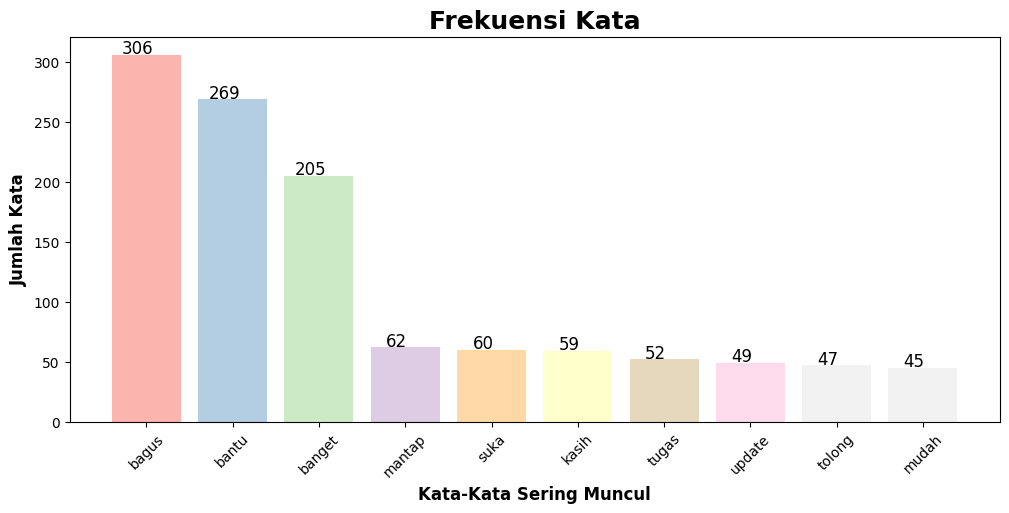

In [89]:
text = " ".join(df["steming_data"])

tokens = [word for word in text.split() if word not in stop_words]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
# palet warna
colors = plt.cm.Pastel1(range(len(word)))

# Membuat plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.show()

**N-Gram**

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

text_data = df['steming_data'].astype(str)

stop_words_list = list(stop_words)

colors = plt.cm.Pastel1(range(15))

# Fungsi untuk mendapatkan n-gram
def get_ngrams(text_series, ngram_range=(1,1), top_n=15):
    vectorizer = CountVectorizer(
        ngram_range=ngram_range,
        stop_words=stop_words_list
    )
    X = vectorizer.fit_transform(text_series)
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    return Counter(dict(zip(ngrams, counts))).most_common(top_n)

# Fungsi untuk menampilkan plot n-gram
def plot_ngrams(ngrams_data, title):
    ngrams, freqs = zip(*ngrams_data)
    plt.figure(figsize=(10, 5))
    plt.barh(ngrams, freqs, color=colors[:len(ngrams)])
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("Frekuensi", fontsize=12)
    plt.ylabel("Kata / Frasa", fontsize=12)
    plt.gca().invert_yaxis()
    plt.show()


**UNIGRAM**

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'rt', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


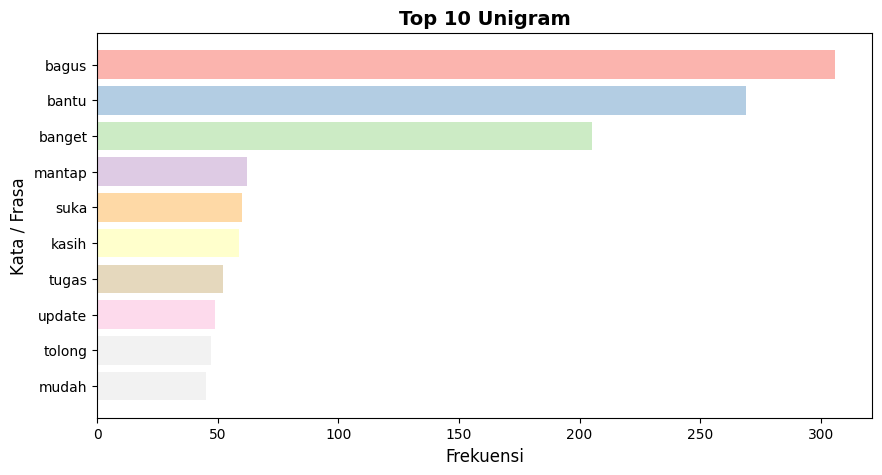

In [91]:
# Unigram
unigrams = get_ngrams(text_data, ngram_range=(1,1), top_n=10)
plot_ngrams(unigrams, "Top 10 Unigram")

**Bigram**

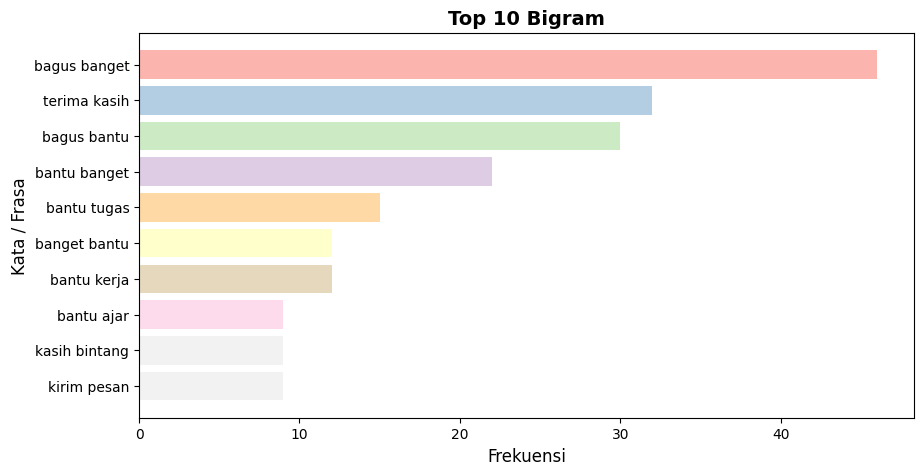

In [92]:
# Bigram
bigrams = get_ngrams(text_data, ngram_range=(2,2), top_n=10)
plot_ngrams(bigrams, "Top 10 Bigram")

**Trigram**

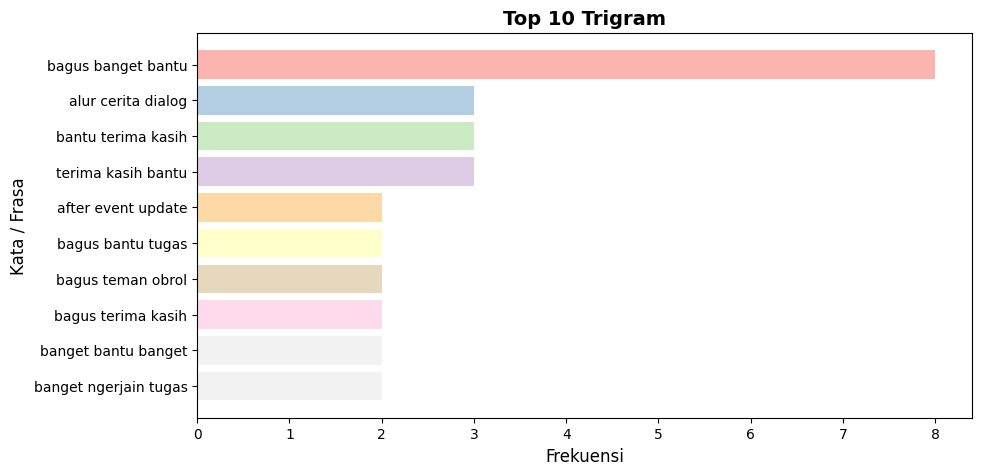

In [93]:
# Trigram
trigrams = get_ngrams(text_data, ngram_range=(3,3), top_n=10)
plot_ngrams(trigrams, "Top 10 Trigram")